In [1]:
import numpy as np

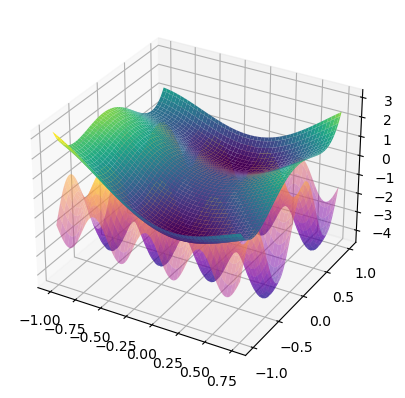

In [2]:
def f(x, y):
    return 4 * x ** 2 - 2.1 * x ** 4 + (1 / 3) * x ** 6 + x * y - 4 * y ** 2 + 4 * y ** 4


def g(x, y):
    return -np.sin(4 * np.pi * x) + 2 * np.sin(2 * np.pi * y) - 1.5


x = np.linspace(-1, 0.75, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot_surface(X, Y, g(X, Y), cmap='plasma', alpha=0.5)

plt.show()




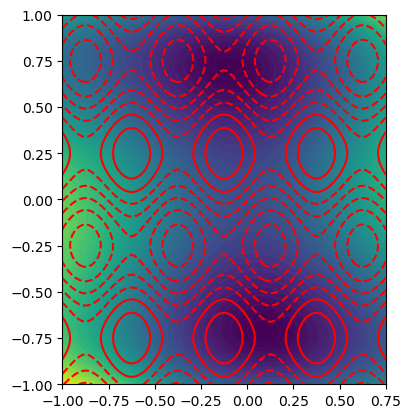

In [3]:
# draw f(x) with constrained g(x)
plt.contour(X, Y, Z, 50)
plt.contour(X, Y, g(X, Y), colors='r')
plt.imshow(Z, extent=[-1, 0.75, -1, 1], origin='lower', cmap='viridis')

plt.show()

0.09595959595959602 -0.7171717171717171 -1.0313423343354877


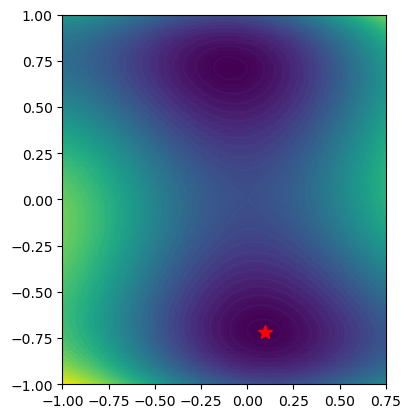

In [4]:
# draw the 2d contour plot
plt.contour(X, Y, Z, 50)
x_min = X.ravel()[Z.argmin()]
y_min = Y.ravel()[Z.argmin()]
print(x_min, y_min, f(x_min, y_min))

plt.plot(x_min, y_min, 'r*', markersize=10)
plt.imshow(Z, extent=[-1, 0.75, -1, 1], origin='lower', cmap='viridis')
plt.show()

In [5]:
# check if the constraint is satisfied
print(g(x_min, y_min))

-0.47654296783554995


In [10]:
# Use genetic programming to find the minimum of the function with constraints.
import random


def fitness(x, y):
    if g(x, y) > 0:
        return float('inf')
    return f(x, y)


def crossover(parent1, parent2):
    child = [0, 0]
    child[0] = (parent1[0] + parent2[0]) / 2
    child[1] = (parent2[1] + parent2[1]) / 2
    return child


def mutate(child, mutation_rate=1):
    if random.random() < mutation_rate:
        child[0] = random.uniform(-1, 0.75)
        child[1] = random.uniform(-1, 1)
    if g(child[0], child[1]) > 0:
        return mutate(child, mutation_rate)
    return child


def genetic_algorithm(fitness, crossover, mutate, n_generations, n_population):
    population = [[random.uniform(-1, 0.75), random.uniform(-1, 1)] for _ in range(n_population)]
    for _ in range(n_generations):
        population = sorted(population, key=lambda x: fitness(x[0], x[1]))
        # population = population[:n_population]
        parents = population[:n_population // 2]
        children = []
        for i in range(n_population):
            parent1 = random.choice(parents)
            parent2 = random.choice(parents)
            child = crossover(parent1, parent2)
            children.append(child)
            child = mutate(child)
            children.append(child)
        population = parents + children
    return population[0]


solution = genetic_algorithm(fitness, crossover, mutate, 1000, 100)
print(
    f"Solution (minimum): f({round(solution[0], 4)}, {round(solution[1], 4)}) = {round(f(solution[0], solution[1]), 4)}")

Solution (minimum): f(0.0872, -0.7112) = -1.0316
